In [1]:
############################################################################
# HER2 Overexpression,This is the analysis of the results of ensemble clustering       
############################################################################
%matplotlib inline 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
#from cooccurrence import coMat
import openensembles as oe
import finishing as finish

import pickle
pd.set_option("display.max_rows",101)

[dataObj_P, dataObj_24H, c_P, c_24H, c_link_P, c_link_24H, c_g_P, c_g_24H] = pickle.load( open( "P_24H_ensembleClusterworkspace.p", "rb" ))


In [2]:
coMat_P = c_P.co_occurrence_matrix('parent')
coMat_24H = c_24H.co_occurrence_matrix('parent')

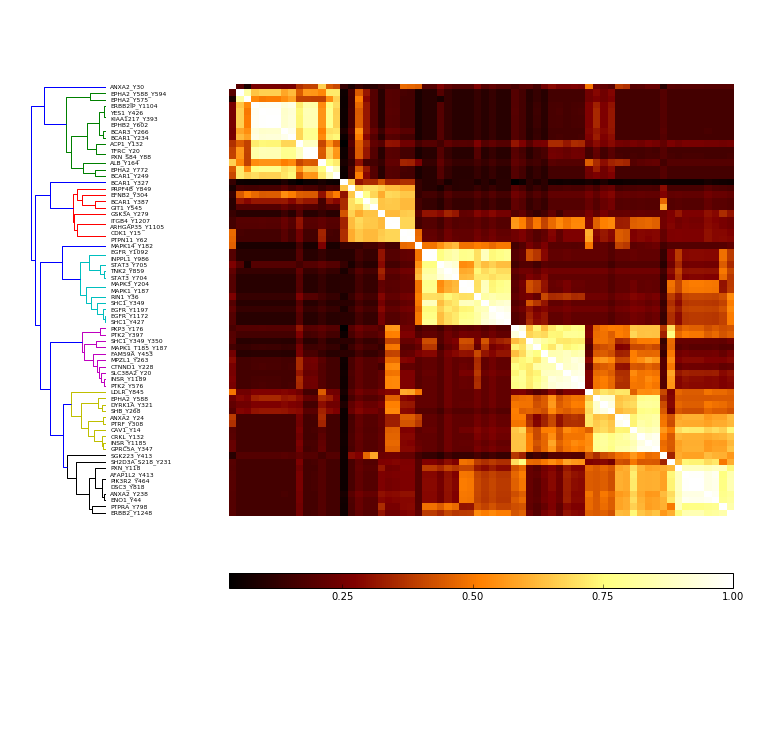

In [3]:
f_P = coMat_P.plot(distance_threshold=0.45)
f_P.set_size_inches(8.5, 8.5, forward=True)
f_P.savefig('P_coOccMatrix.svg', format='svg', bbox_inches='tight', dpi=1200)

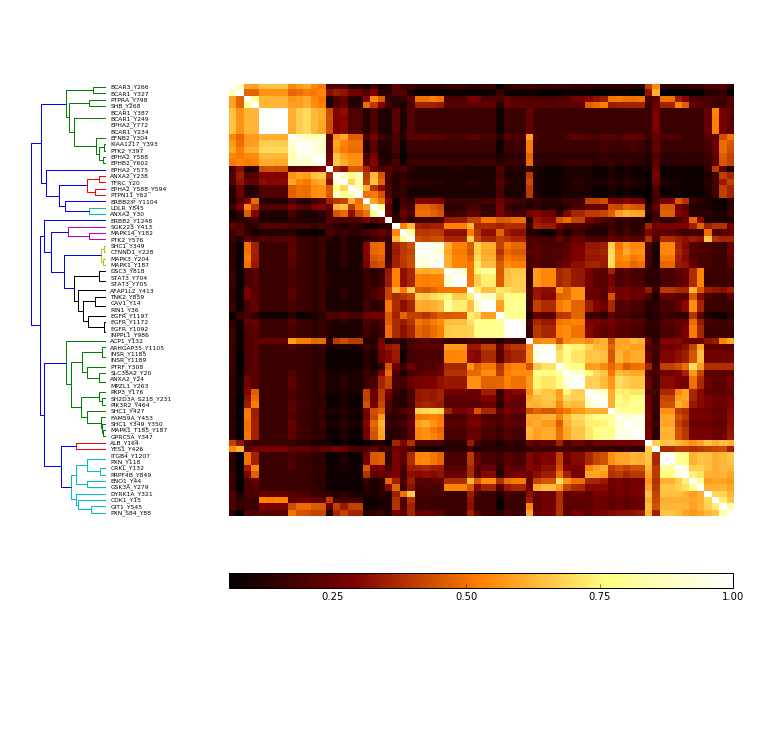

In [4]:
f_24H = coMat_24H.plot(distance_threshold=0.45)
f_24H.set_size_inches(8.5, 8.5, forward=True)
f_24H.savefig('24H_coOccMatrix.svg', format='svg', bbox_inches='tight', dpi=1200)

## Compare top and bottom quartiles 

In [5]:
coMat_pair_P = coMat_P.pairwise_list()
coMat_pair_24H = coMat_24H.pairwise_list()


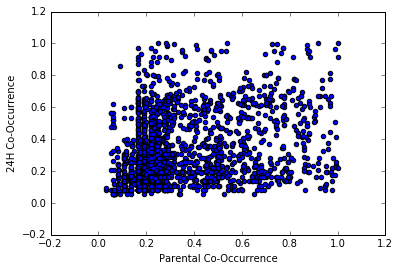

In [6]:
# What is the similarity between the two
plt.scatter(coMat_pair_P['pairwise'], coMat_pair_24H['pairwise'])
plt.xlabel('Parental Co-Occurrence')
plt.ylabel('24H Co-Occurrence')

In [7]:
#compare the differences in clustering to that of the direct correlation
#Calculate correlation of peptides between the datasets
df1 = dataObj_P.df
df2 = dataObj_24H.df
df1.columns = [0, 5, 10, 30]
df2.columns = df1.columns
df_corr = df1.corrwith(df2, axis=1)


In [9]:
#List the correlations that are less than 0.5
df_corr[df_corr<0.5]


gene_site
ALB_Y164         -0.749120
BCAR3_Y266        0.461549
YES1_Y426        -0.479415
SGK223_Y413      -0.243006
ARHGAP35_Y1105    0.471324
PRPF4B_Y849      -0.829022
PTPN11_Y62        0.326561
PTK2_Y576         0.319880
dtype: float64

In [11]:
# Merge the coMatrixes of parental and 24H into a single coMat_pairings
df_temp = coMat_pair_24H['pairwise']
df_temp.columns = ['pairwise_24H']
coMat_pairings = pd.concat([coMat_pair_P, df_temp], axis=1, join='inner')
coMat_pairings.columns = ['site_1', 'site_2', 'pairwise_P', 'pairwise_24H']
coMat_pairings

,site_1,site_2,pairwise_P,pairwise_24H
ALB_Y164; SLC38A2_Y20,ALB_Y164,SLC38A2_Y20,0.190909,0.200000
ALB_Y164; PTPRA_Y798,ALB_Y164,PTPRA_Y798,0.190909,0.190909
ALB_Y164; LDLR_Y845,ALB_Y164,LDLR_Y845,0.450000,0.109091
ALB_Y164; BCAR3_Y266,ALB_Y164,BCAR3_Y266,0.513636,0.409091
ALB_Y164; AFAP1L2_Y413,ALB_Y164,AFAP1L2_Y413,0.190909,0.340909
ALB_Y164; YES1_Y426,ALB_Y164,YES1_Y426,0.554545,0.672727
ALB_Y164; EFNB2_Y304,ALB_Y164,EFNB2_Y304,0.304545,0.163636
ALB_Y164; ANXA2_Y30,ALB_Y164,ANXA2_Y30,0.668182,0.136364
ALB_Y164; ANXA2_Y238,ALB_Y164,ANXA2_Y238,0.190909,0.054545
ALB_Y164; ANXA2_Y24,ALB_Y164,ANXA2_Y24,0.354545,0.254545


In [12]:
# Return the top in the Parental that are bottom in 24H
threshold = 0.75
df_topP_bott24H = coMat_pairings[(coMat_pairings.pairwise_P >= threshold) & (coMat_pairings.pairwise_24H <= (1-threshold))]
df_top24H_bottP = coMat_pairings[(coMat_pairings.pairwise_24H >= threshold) & (coMat_pairings.pairwise_P <= (1-threshold))]

In [13]:
df_topP_bott24H.sort_values(by='pairwise_P', ascending=False)

,site_1,site_2,pairwise_P,pairwise_24H
PIK3R2_Y464; DSC3_Y818,PIK3R2_Y464,DSC3_Y818,1.000000,0.218182
YES1_Y426; EPHB2_Y602,YES1_Y426,EPHB2_Y602,0.995455,0.227273
YES1_Y426; KIAA1217_Y393,YES1_Y426,KIAA1217_Y393,0.995455,0.236364
CDK1_Y15; PTPN11_Y62,CDK1_Y15,PTPN11_Y62,0.990909,0.172727
AFAP1L2_Y413; PIK3R2_Y464,AFAP1L2_Y413,PIK3R2_Y464,0.990909,0.222727
INSR_Y1189; PTK2_Y576,INSR_Y1189,PTK2_Y576,0.977273,0.172727
ANXA2_Y238; ENO1_Y44,ANXA2_Y238,ENO1_Y44,0.977273,0.081818
KIAA1217_Y393; ERBB2IP_Y1104,KIAA1217_Y393,ERBB2IP_Y1104,0.977273,0.136364
ERBB2IP_Y1104; EPHB2_Y602,ERBB2IP_Y1104,EPHB2_Y602,0.977273,0.218182
YES1_Y426; ERBB2IP_Y1104,YES1_Y426,ERBB2IP_Y1104,0.972727,0.190909


In [14]:
df_top24H_bottP.sort('pairwise_24H', ascending=False)

/Users/knaegle/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,site_1,site_2,pairwise_P,pairwise_24H
ITGB4_Y1207; PXN_Y118,ITGB4_Y1207,PXN_Y118,0.250000,1.000000
KIAA1217_Y393; PTK2_Y397,KIAA1217_Y393,PTK2_Y397,0.163636,0.972727
SHC1_Y349; CTNND1_Y228,SHC1_Y349,CTNND1_Y228,0.218182,0.972727
MAPK3_Y204; CTNND1_Y228,MAPK3_Y204,CTNND1_Y228,0.236364,0.950000
CRKL_Y132; PRPF4B_Y849,CRKL_Y132,PRPF4B_Y849,0.177273,0.931818
ANXA2_Y238; TFRC_Y20,ANXA2_Y238,TFRC_Y20,0.163636,0.918182
MAPK1_Y187; CTNND1_Y228,MAPK1_Y187,CTNND1_Y228,0.227273,0.913636
PTK2_Y397; EPHB2_Y602,PTK2_Y397,EPHB2_Y602,0.163636,0.895455
EFNB2_Y304; PTK2_Y397,EFNB2_Y304,PTK2_Y397,0.218182,0.881818
TNK2_Y859; CAV1_Y14,TNK2_Y859,CAV1_Y14,0.245455,0.881818


In [15]:
## COUNT the number of times an object has made a major shift with a partner 
#use site_1 or site_2 to get a list of unique things, then count the number of times
dfX = df_topP_bott24H
movedTogether = []
movedTogether.extend(dfX['site_1'].values.tolist())
movedTogether.extend(dfX['site_2'].values.tolist())

uniqueList = np.unique(movedTogether)
for item in uniqueList:
    print("%s:%d"%(item, movedTogether.count(item)))

AFAP1L2_Y413:2
ALB_Y164:1
ANXA2_Y238:7
BCAR1_Y234:2
BCAR3_Y266:3
CAV1_Y14:2
CDK1_Y15:1
CRKL_Y132:2
CTNND1_Y228:2
DSC3_Y818:4
DYRK1A_Y321:2
EGFR_Y1197:1
ENO1_Y44:2
EPHA2_Y588:4
EPHA2_Y772:2
EPHB2_Y602:2
ERBB2IP_Y1104:7
ERBB2_Y1248:4
FAM59A_Y453:1
GPRC5A_Y347:2
INSR_Y1185:2
INSR_Y1189:3
KIAA1217_Y393:2
MAPK1_T185_Y187:1
MPZL1_Y263:1
PIK3R2_Y464:4
PKP3_Y176:2
PTK2_Y397:5
PTK2_Y576:7
PTPN11_Y62:1
PTPRA_Y798:4
PXN_S84_Y88:3
PXN_Y118:3
SH2D3A_S218_Y231:1
SHB_Y268:2
SHC1_Y427:1
SLC38A2_Y20:3
TFRC_Y20:2
YES1_Y426:4


## Plotting Finished Solutions in 3D space

In [16]:
dataObj = oe.data(dataObj_P.df, dataObj_P.x['parent'])
dataObj.transform('parent', 'PCA', 'pca', n_components=3)



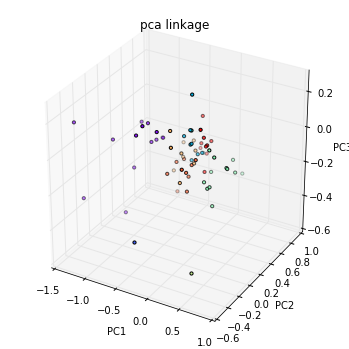

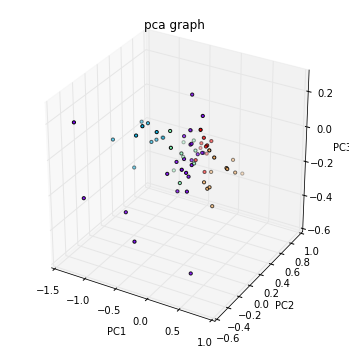

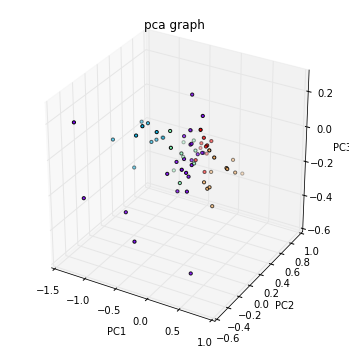

In [17]:
labels = c_link_P.labels['co_occ_linkage']
dataObj.plot_data('pca', title='pca linkage', class_labels=labels)


labels = c_g_P.labels['graph_closure']
dataObj.plot_data('pca', fignum=1, title='pca graph', class_labels=labels)

In [18]:
print("The number of clusters in parental graph closure: %d"%(len(c_g_P.clusterNumbers['graph_closure'])))
print("The number of clusters in 24H graph closure: %d"%(len(c_g_24H.clusterNumbers['graph_closure'])))

print("The number of clusters in parental Ward Linkage: %d"%(len(c_link_P.clusterNumbers['co_occ_linkage'])))
print("The number of clusters in 24H Ward Linkage: %d"%(len(c_link_24H.clusterNumbers['co_occ_linkage'])))


The number of clusters in parental graph closure: 5
The number of clusters in 24H graph closure: 7
The number of clusters in parental Ward Linkage: 9
The number of clusters in 24H Ward Linkage: 12


## What networks are most changed?

In [19]:
#Calculate a difference comatrix
coMat_diff = coMat_P.co_matrix-coMat_24H.co_matrix

In [20]:
diff = coMat_diff.abs().sum()/len(coMat_diff)
diffSort = diff.sort(inplace=False)

/Users/knaegle/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting
  from ipykernel import kernelapp as app


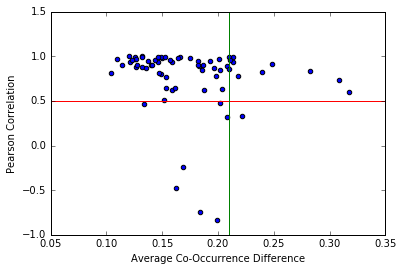

In [21]:
# how doess the self-correlation between P and 24H compare to average difference?
coDiff_threshold = 0.21

fig = plt.figure()
fig.patch.set_alpha(0.5)
ax = fig.add_subplot(111)
ax.patch.set_alpha(0.5)
ax.scatter(diff, df_corr)
plt.axhline(0.5, color='r')
#plt.axhline(0.8, color='b')
plt.axvline(coDiff_threshold, color='g')
plt.xlabel('Average Co-Occurrence Difference')
plt.ylabel('Pearson Correlation')
#f.set_size_inches(4, 4, forward=True)
fig.savefig('Correlations.svg', format='svg', bbox_inches='tight', dpi=1200)

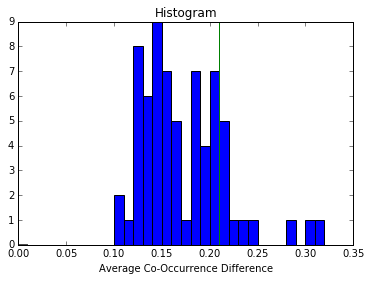

In [22]:
b = np.arange(0, 0.35, 0.01)
n, bins, patches = plt.hist(diff, bins = b)
plt.axvline(coDiff_threshold, color='g')
plt.xlabel('Average Co-Occurrence Difference')
plt.title('Histogram')

In [23]:
l = np.cumsum(n)
nBig = n*(bins[1:]>coDiff_threshold)
x = np.cumsum(nBig)
percExplained = x[-1]/l[-1]
print("Percent above threshold=%0.2f is %2.1f%%"%(coDiff_threshold, percExplained*100))

Percent above threshold=0.21 is 16.2%


In [24]:
#Who are the things that experience significant differences by clustering? 
diffSort 

EPHA2_Y575          0.104211
TNK2_Y859           0.109091
RIN1_Y36            0.114439
MAPK1_Y187          0.120521
STAT3_Y705          0.121591
MAPK14_Y182         0.122861
EGFR_Y1197          0.125602
EGFR_Y1172          0.125735
BCAR1_Y249          0.126270
MAPK3_Y204          0.126738
STAT3_Y704          0.127072
EPHA2_Y588_Y594     0.131618
INPPL1_Y986         0.131952
EGFR_Y1092          0.131952
BCAR3_Y266          0.133890
EPHA2_Y772          0.135361
EFNB2_Y304          0.137032
SHC1_Y349           0.140374
PKP3_Y176           0.140508
GIT1_Y545           0.143316
KIAA1217_Y393       0.146123
EPHB2_Y602          0.146123
CDK1_Y15            0.146992
BCAR1_Y234          0.148930
SHC1_Y349_Y350      0.148930
ANXA2_Y30           0.149666
GSK3A_Y279          0.151872
MAPK1_T185_Y187     0.152139
BCAR1_Y387          0.153008
MPZL1_Y263          0.153342
TFRC_Y20            0.157019
SLC38A2_Y20         0.158690
BCAR1_Y327          0.159225
INSR_Y1189          0.161765
YES1_Y426     